# Inspección de datos


## Descripción del dataset


## Descripción de columnas del dataset



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('DelayedFlights.csv', low_memory=False)

## Cantidad de registros
El archivo contiene 1936758 filas y 30 columnas

In [2]:
print(f'Cantidad de filas: {df.shape[0]} - Cantidad de columnas: {df.shape[1]}')

Cantidad de filas: 1936758 - Cantidad de columnas: 30


In [6]:
print(df.describe())

         Unnamed: 0       Year         Month    DayofMonth     DayOfWeek  \
count  1.936758e+06  1936758.0  1.936758e+06  1.936758e+06  1.936758e+06   
mean   3.341651e+06     2008.0  6.111106e+00  1.575347e+01  3.984827e+00   
std    2.066065e+06        0.0  3.482546e+00  8.776272e+00  1.995966e+00   
min    0.000000e+00     2008.0  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.517452e+06     2008.0  3.000000e+00  8.000000e+00  2.000000e+00   
50%    3.242558e+06     2008.0  6.000000e+00  1.600000e+01  4.000000e+00   
75%    4.972467e+06     2008.0  9.000000e+00  2.300000e+01  6.000000e+00   
max    7.009727e+06     2008.0  1.200000e+01  3.100000e+01  7.000000e+00   

            DepTime    CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  1.936758e+06  1.936758e+06  1.929648e+06  1.936758e+06  1.936758e+06   
mean   1.518534e+03  1.467473e+03  1.610141e+03  1.634225e+03  2.184263e+03   
std    4.504853e+02  4.247668e+02  5.481781e+02  4.646347e+02  1.944702e+03   

## Nombres de columnas
En primera instancia se puede observar que los nombres de las columnas no tienen espacios en blanco ni carácteres especiales a excepción de "Unnamed: 0". Esta columna debe ser renombrada para facilitar su manipulación.

In [7]:
print(df.columns)

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


## Descripción de columnas

Columnas temporales:
- Year (int): año del vuelo
- Month (int): mes del vuelo
- DayofMonth (int): día del mes del departure del vuelo
- DayOfWeek (int): día de la semana del vuelo (lunes, martes, ..., domingo)
- DepTime (int): Hora real del departure
- CRSDepTime (int): Hora del departure programada
- ArrvTime (int): Hora real del arrival
- ActualElapsedTime (int): tiempo (en minutos) programado desde el cierre de puerta en el aeropuerto de origen hasta la apertura en el destino
- CRSElapsedTime (int): Idem columna anterior, pero el valor real
- AirTime (int): tiempo real de vuelo en minutos
- TaxiIn (int): corresponde al tiempo en minutos que le toma a la aeronave desde que toca tierra en el aeropuerto de destino hasta que se detiene
- TaxiOut (int): corresponde al tiempo en minutos que le toma a la aeronave desde que suelta los frenos en el aeropuerto de origen hasta que se eleva y deja tierra


Columnas de delays:
- ArrDelay (int): retraso real en minutos en la llegada de cada vuelo al aeropuerto de destino
- DepDelay (int): retraso real en minutos en el despegue de cada vuelo desde el aeropuerto de origen
- CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay (todos int): son retrasos debidos a distintas razones puntuales menos frecuentes. En el orden que fueron mencionadas estas corresponden a condiciones del transportista/carrier que pueden tener relación con limpieza y mantención de la aeronave, condiciones climáticas infrecuentes que dificulten el vuelo, ordenadas por National Airspace System (NAS), de seguridad (evacuaciones) u operacionales (atada a atrasos de vuelos anteriores por ejemplo)

Columnas de origen y destino
- Origin (str): Aeropuerto de origen
- Dest (str): Aeropuerto de destino
- Distance (float): Distancia que conecta ambos aeropuertos en kms

Columnas descriptivas de cada vuelo
- FlightNum (int): corresponde a una etiqueta numérica a cada vuelo
- TailNum (str): etiqueta de la aeronave que realiza el vuelo
- UniqueCarrier (str): corresponde a un código que representa a las partes o aerolíneas a cargo de operar cada vuelo

Códigos de cancelaciones
- Cancelled (int): es un entero 0 o 1, dependiendo si el vuelo se canceló o no
- CancellationCode (str): corresponde a un código de tipo de cancelación, donde N representa que no existió cancelación

## Tipos de datos
Un tema importante al importar los datos es considerar que hay campos que se importan como numéricos que son categóricos, como por ejemplo "FlightNum" o "Cancelled". Por lo tanto es importante definir este tipo de campos como categóricos para evitar problemas.

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

## Valores nulos
A continuación se muestran los campos que continienen valores nulos, siendo "LateAircraftDelay", "WeatherDelay", "NASDelay", "SecurityDelay" y "CarrierDelay" los que contienen la mayor cantidad de valores nulos.

In [9]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values = missing_values / df.shape[0] * 100
print(missing_values)

LateAircraftDelay    35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
CarrierDelay         35.588855
ActualElapsedTime     0.433043
ArrDelay              0.433043
AirTime               0.433043
ArrTime               0.367108
TaxiIn                0.367108
TaxiOut               0.023493
CRSElapsedTime        0.010223
TailNum               0.000258
dtype: float64


## Valores duplicados
En el dataset no existen registros duplicados.

In [11]:

duplicated_rows = df.duplicated()
duplicated_rows = duplicated_rows[duplicated_rows]
duplicated_rows

Series([], dtype: bool)

## Rangos de valores

In [12]:
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


### Histogramas variables numéricas más importantes

C:\Users\Diego\AppData\Local\Temp\ipykernel_21832\1230451528.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[["DepTime", "CRSDepTime", "ArrTime"]].hist(ax=ax)


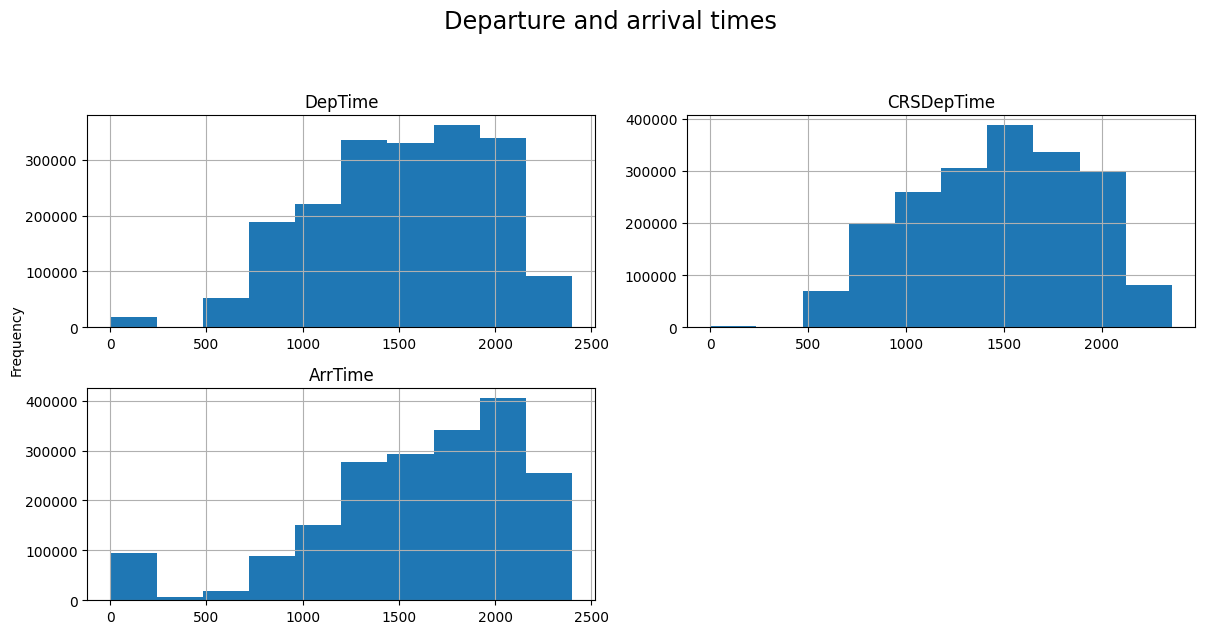

In [7]:
fig, ax = plt.subplots(sharex=False, sharey=False, figsize=(12,6))
df[["DepTime", "CRSDepTime", "ArrTime"]].hist(ax=ax)
fig.text(0, 0.5, "Frequency", va="center", rotation="vertical")
plt.suptitle("Departure and arrival times", x=0.5, y=1.05, ha="center", fontsize="xx-large")
plt.tight_layout()

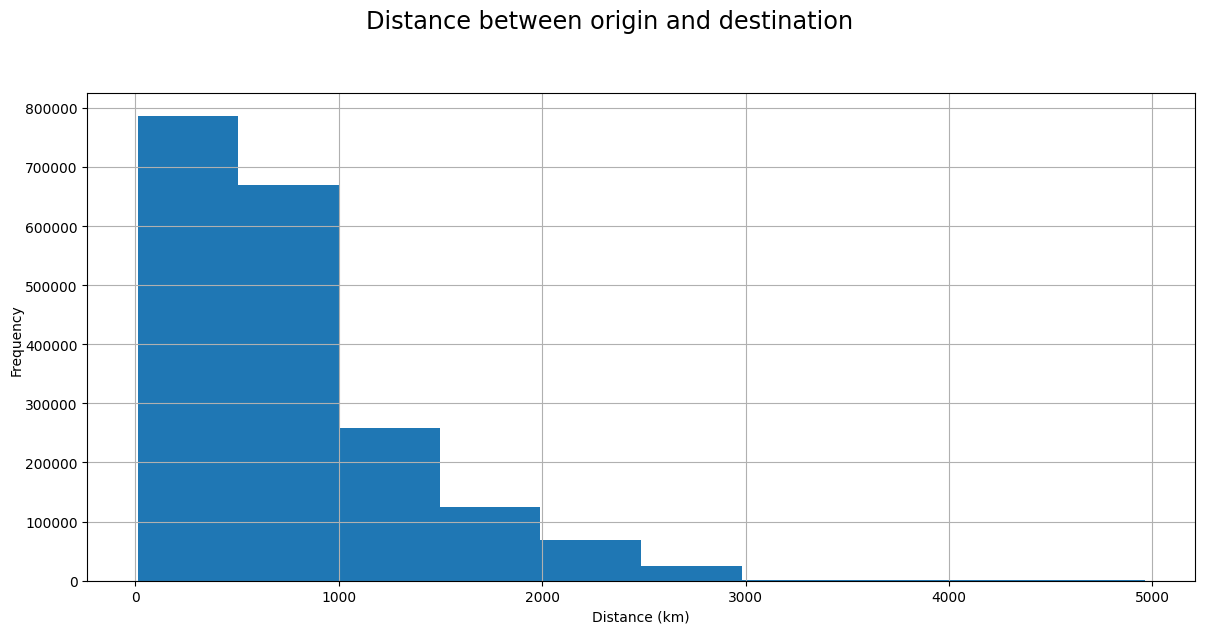

In [11]:
fig, ax = plt.subplots(sharex=False, sharey=False, figsize=(12,6))
df["Distance"].hist(ax=ax)
ax.set_xlabel("Distance (km)")
fig.text(0, 0.5, "Frequency", va="center", rotation="vertical")
plt.suptitle("Distance between origin and destination", x=0.5, y=1.05, ha="center", fontsize="xx-large")
plt.tight_layout()

C:\Users\Diego\AppData\Local\Temp\ipykernel_21832\2137274734.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[["ActualElapsedTime", "CRSElapsedTime", "AirTime", "TaxiIn", "TaxiOut"]].hist(ax=ax)


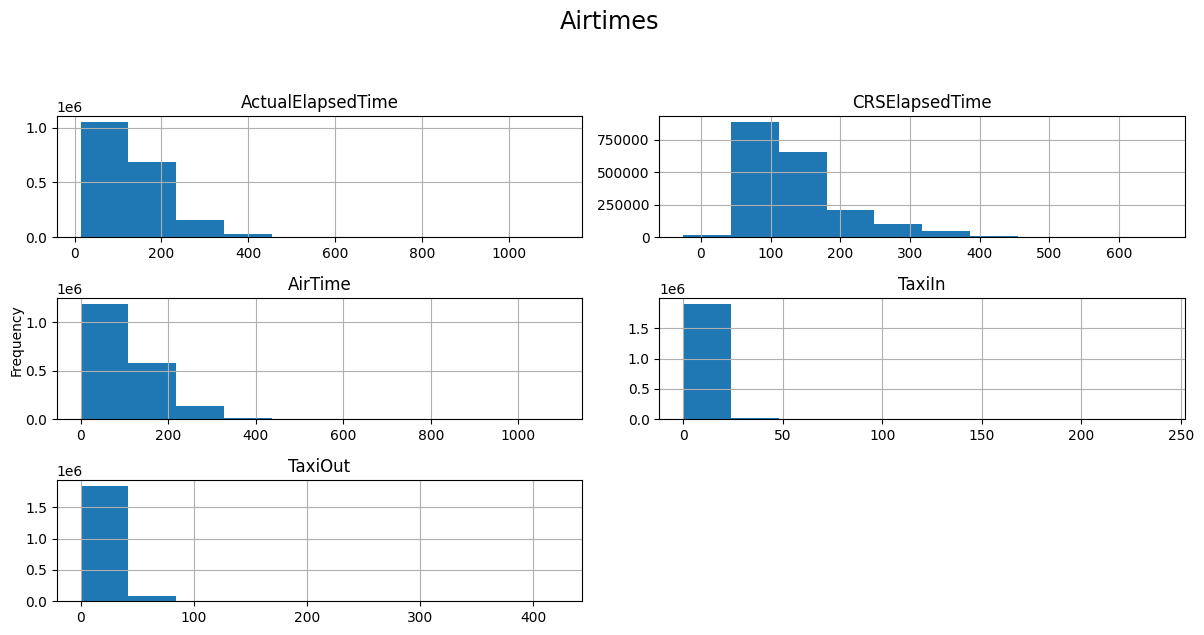

In [8]:
fig, ax = plt.subplots(sharex=False, sharey=False, figsize=(12,6))
df[["ActualElapsedTime", "CRSElapsedTime", "AirTime", "TaxiIn", "TaxiOut"]].hist(ax=ax)
fig.text(0, 0.5, "Frequency", va="center", rotation="vertical")
plt.suptitle("Airtimes", x=0.5, y=1.05, ha="center", fontsize="xx-large")
plt.tight_layout()

### Proporciones variables categóricas más relevantes

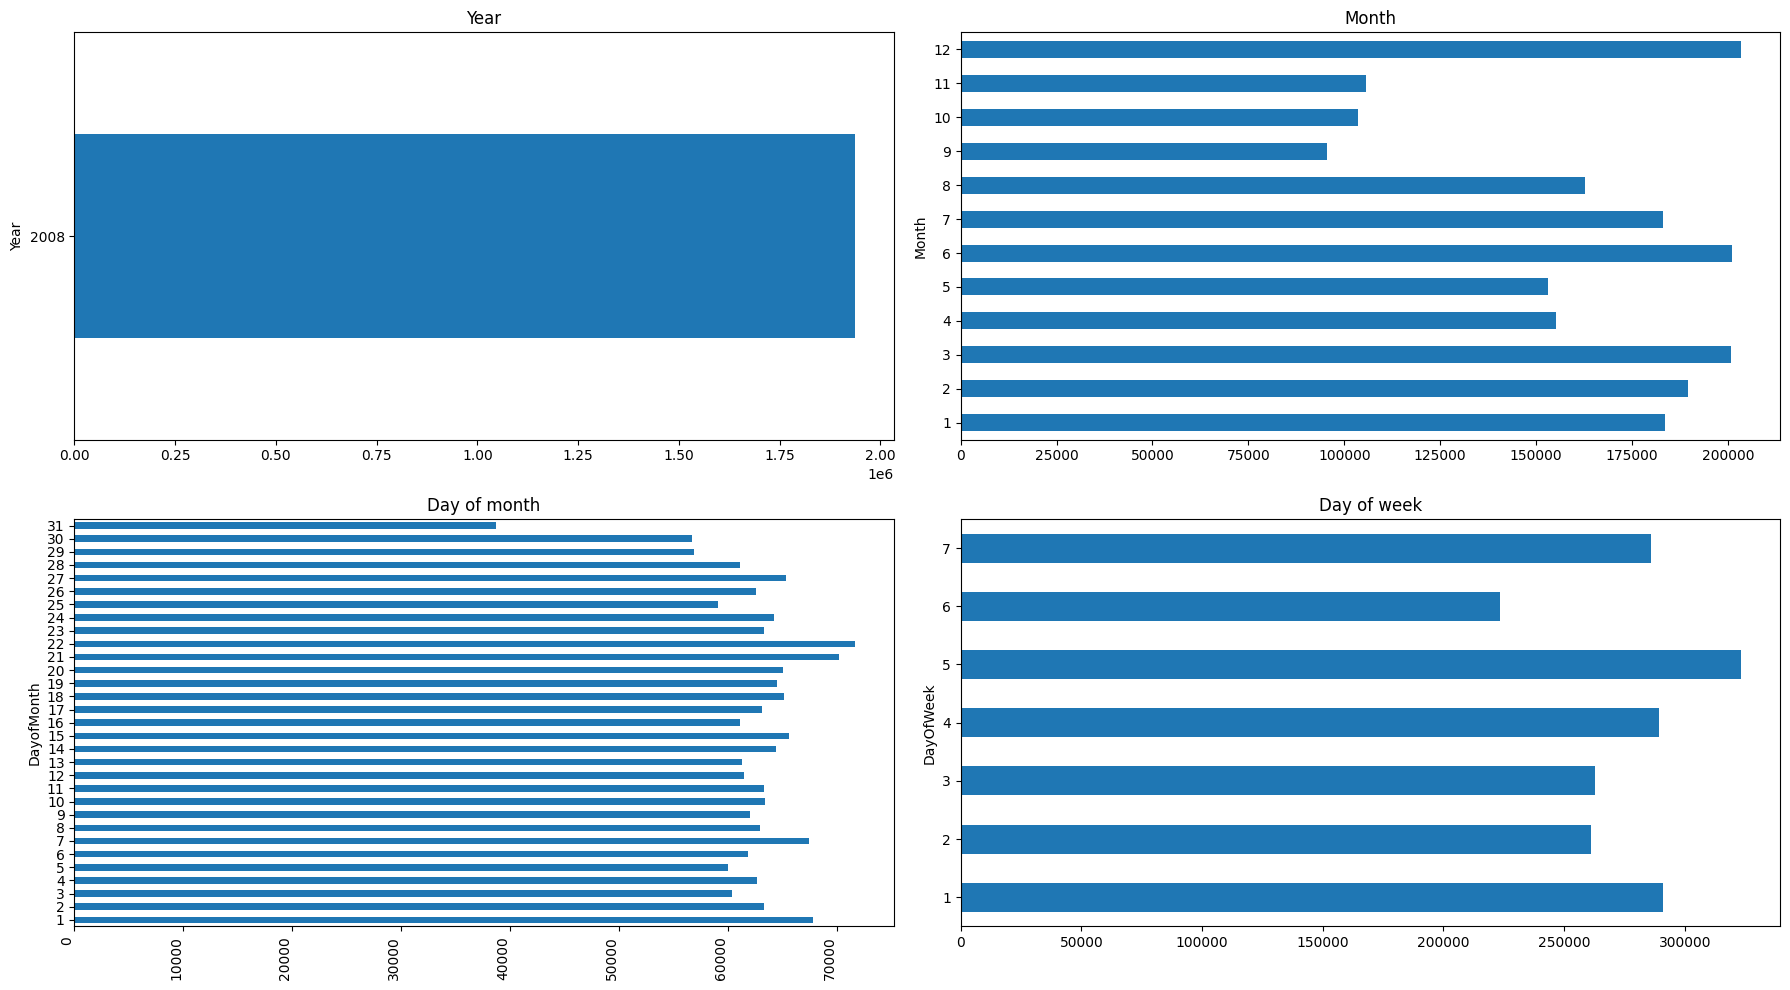

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
df["Year"].value_counts(ascending=False).sort_index().plot(kind='barh', ax=ax[0, 0])
df["Month"].value_counts(ascending=False).sort_index().plot(kind='barh', ax=ax[0, 1])
df["DayofMonth"].value_counts(ascending=False).sort_index().plot(kind='barh', ax=ax[1, 0])
df["DayOfWeek"].value_counts(ascending=False).sort_index().plot(kind='barh', ax=ax[1, 1])
ax[0, 0].set_title("Year")
ax[0, 1].set_title("Month")
ax[1, 0].set_title("Day of month")
ax[1, 1].set_title("Day of week")
plt.setp(ax[1, 0].get_xticklabels(), rotation=90, ha='right')
plt.tight_layout()

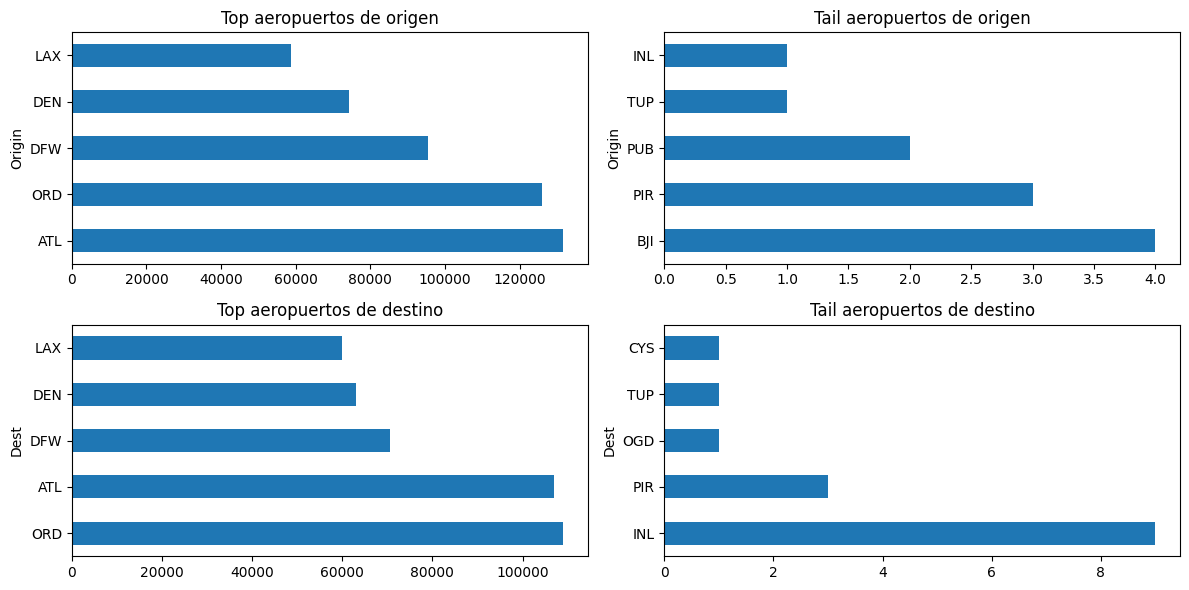

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
df["Origin"].value_counts(ascending=False).head(5).plot(kind='barh', ax=ax[0, 0])
df["Origin"].value_counts(ascending=False).tail(5).plot(kind='barh', ax=ax[0, 1])
df["Dest"].value_counts(ascending=False).head(5).plot(kind='barh', ax=ax[1, 0])
df["Dest"].value_counts(ascending=False).tail(5).plot(kind='barh', ax=ax[1, 1])
ax[0, 0].set_title("Top aeropuertos de origen")
ax[0, 1].set_title("Tail aeropuertos de origen")
ax[1, 0].set_title("Top aeropuertos de destino")
ax[1, 1].set_title("Tail aeropuertos de destino")
plt.tight_layout()

# Correlaciones

Se analizan correlaciones, con el fin de identificar tendencias relevantes entre columnas y darles una interpretación. Se excluyen variables categóricas como el Carrier o códigos de cancelaciones y también variables que por su naturaleza no tiene un sentido lógico incluirlas en la matriz de correlaciones

Text(0.5, 1.0, 'Correlation Heatmap')

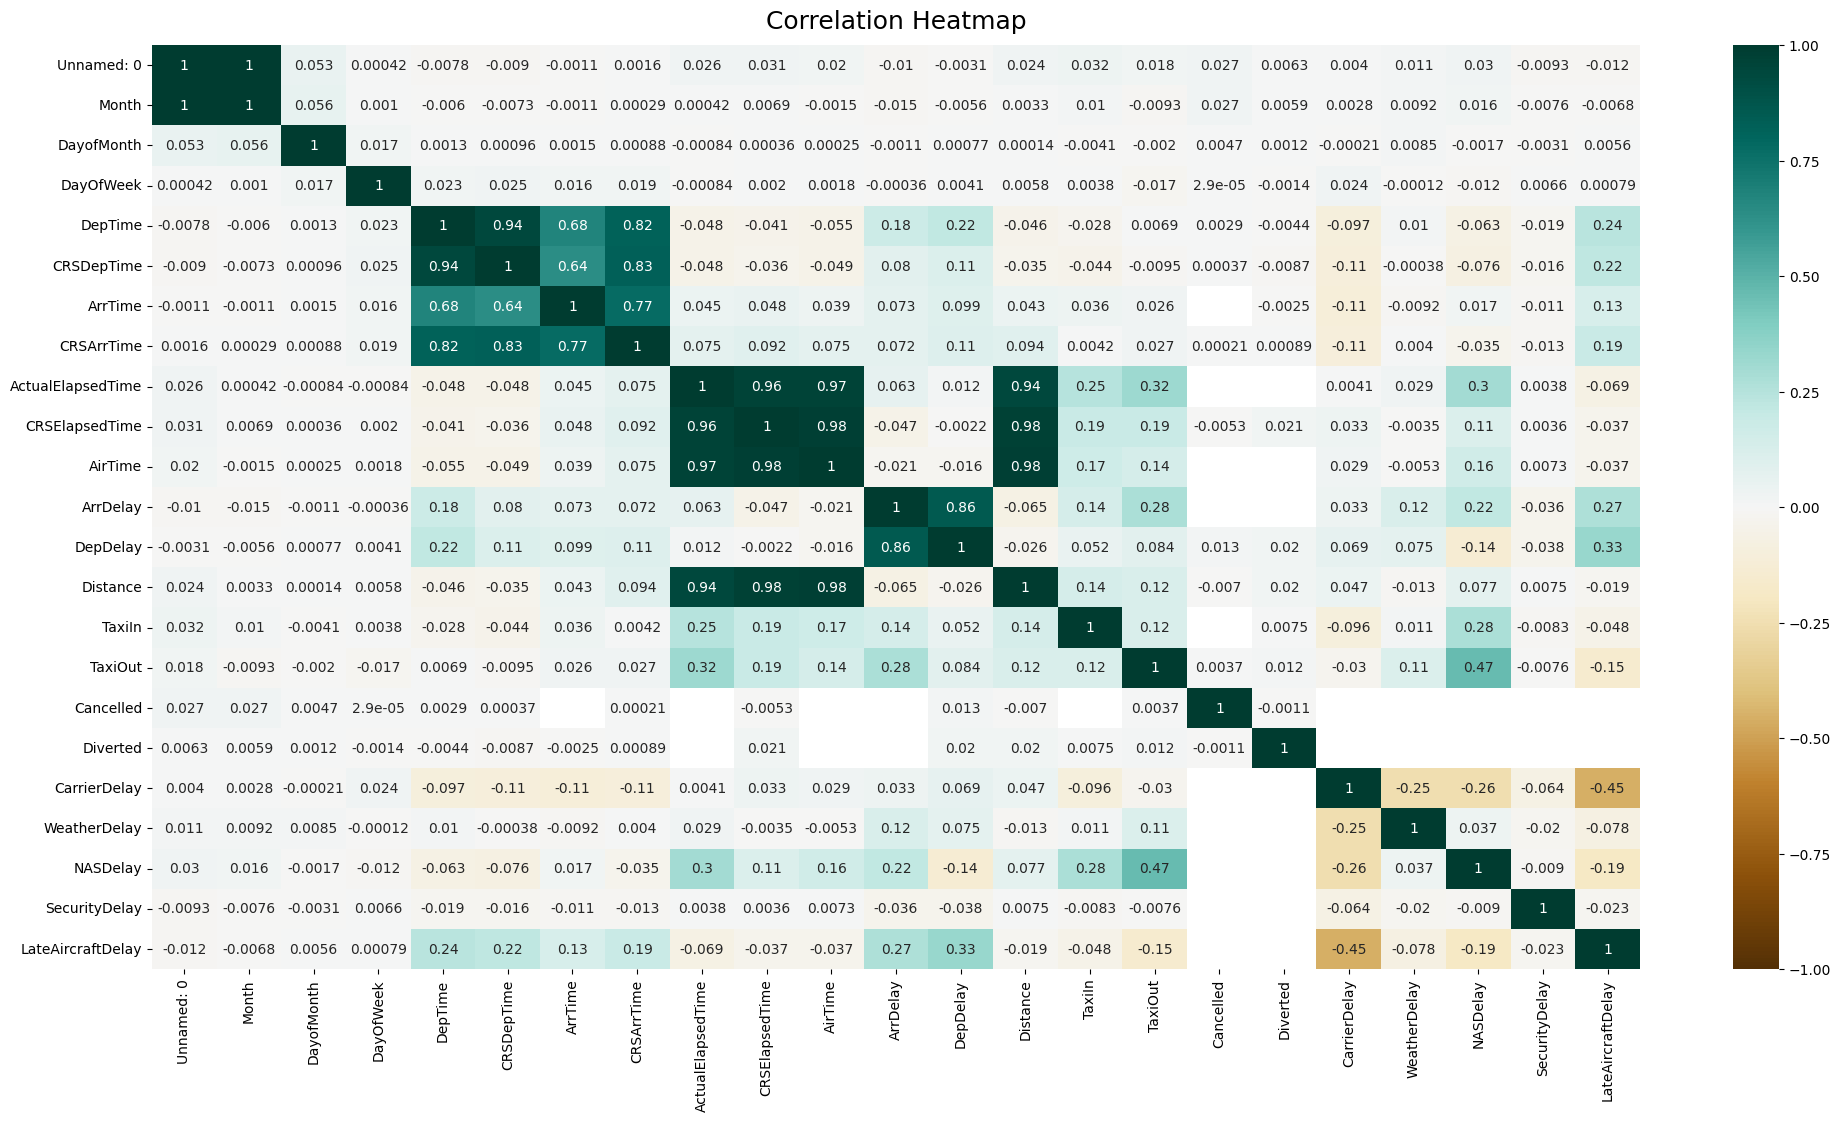

In [14]:
exclude_cols = ["Year", "FlightNum"] #El año se excluye porque son solo vuelos del 2008 y el número de vuelo porque tiene solo un fin descriptivo por vuelo
corrs = df.drop(exclude_cols, axis=1, inplace=False).copy().corr(numeric_only=True, method="spearman")

plt.figure(figsize=(24, 12))
heatmap = sns.heatmap(corrs, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

Los espacios en blanco dan cuenta de casos donde no fue posible calcular la correlación dada la gran cantidad de valores faltantes. Las principales observaciones de la matriz son:

Correlaciones >= 0.9: Por ejemplo la distancia con las 3 variables de tiempos de vuelo (ActualEllapsedTime, CRSEllapsedTime y AirTime) tienen correlaciones muy altas, lo cual se explica porque evidentemente a mayor distancia entre origen y destino mayores son los tiempos de vuelo. Otro ejemplo, se da entre DepTime y CRSDepTime, lo cual es también evidente porque ambas representan lo mismo (hora de despegue), solo que un caso es la hora real de despegue y el otro la hora programada de despegue (en muchos casos son iguales).

Correlaciones altas, pero menores a 0.9: se observa por ejemplo correlaciones entre 0.6 y 0.8 entre las variables de tiempo de despegue y de llegada, lo cual es evidente, ya que mientras más tarde se despega, más tarde se llega.

Correlaciones apreciables, pero no extremadamente altas (aprox entre 0.20 y 0.4): se observan por ejemplo correlaciones apreciables positivas entre TaxiIn y TaxiOut con el NASDelay. Otro ejemplo es entre el DepDelay y el DepTime, lo cual da cuenta que los retrasos de los vuelos están de cierta forma favorecidos por ciertos bloques horarios. Esto último ocurre no solo con el DepDelay, sino también con otros delays como por ejemplo el LateAircraftDelay y no solo se favorecen por bloques horarios del despegue, sino también por bloques horarios en la llegada o arrival.

Correlaciones apreciables y negativas: se observan por ejemplo correlaciones entre -0.4 y -0.2 entre los distintos tipos de delays. Estas correlaciones no son relevantes, porque primero es evidente que si se da un tipo de retraso el otro tipo será menor y además se vio anteriormente que los tipos de delays que no son DepDelay y ArrDelay tienen una cantidad muy alta de valores faltantes, por lo que algunos de estos comportamientos no son del todo fidedignos.